<h2 align='center'> MÔN HỌC: KỸ NGHỆ TRI THỨC VÀ HỌC MÁY (7080510) </h2>

---

* Mã sinh viên: 1821050295
* Họ và tên: Đỗ Thị Huyền
* Lớp/Nhóm môn học: DCCTPM63A / Nhóm 01
* Email: huyenjy@gmail.com

---

## BÀI KIỂM TRA ĐIỂM B

---
## 1. TẢI TẬP DỮ LIỆU Data_Practice4_ok.csv VÀ QUAN SÁT TẬP DỮ LIỆU
---


In [1]:
#Gọi các thư viện:
import pandas as pd
import numpy as np
import nltk as nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import naive_bayes
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Đọc file dữ liệu Data_NLP.csv vào biến data
path='Data/Data_Practice4_ok.csv'
data = pd.read_csv(path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Age      956 non-null    int64
 1   Shape    956 non-null    int64
 2   Margin   956 non-null    int64
 3   Density  956 non-null    int64
 4   Target   956 non-null    int64
dtypes: int64(5)
memory usage: 37.5 KB


In [3]:
#Hiển thị 5 dòng đầu tiên - cuối cùng
data.head()

,Age,Shape,Margin,Density,Target
0,3,2,4,2,1
1,1,0,0,2,1
2,2,3,4,2,1
3,0,0,0,2,0
4,3,0,4,2,1


In [4]:
data.tail()

,Age,Shape,Margin,Density,Target
951,1,1,0,2,0
952,2,3,4,2,1
953,2,3,4,2,0
954,3,3,4,2,1
955,2,2,2,2,0


## 2. Phân tách tập dữ liệu đã xử lý ra các biến Độc lập (X) - Phụ thuộc (Y) tương ứng
---


In [5]:
#1.Tách biến độc lập X_data
X_data = data.iloc[:,:-1].values
X_data

array([[3, 2, 4, 2],
       [1, 0, 0, 2],
       [2, 3, 4, 2],
       ...,
       [2, 3, 4, 2],
       [3, 3, 4, 2],
       [2, 2, 2, 2]], dtype=int64)

In [6]:
X_data.shape

(956, 4)

In [7]:
#2.Tách biến phụ thuộc y_data
y_data = data.iloc[:,-1].values
y_data

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [8]:
y_data.shape

(956,)

## 3. Chia tập dữ liệu thành 2 phần Train - Test với tỷ lệ 80%-20%
---
* Tập train (80%) huấn luyện model
* Tập test (20%) đánh giá độ chính xác của model

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.2,
                                                    random_state=42)
print('1.Tập ban đầu:',data.shape)
print('-----------------------')
print('a.Tập Train: ', X_train.shape)
print('b.Tập Test: ', X_test.shape)

1.Tập ban đầu: (956, 5)
-----------------------
a.Tập Train:  (764, 4)
b.Tập Test:  (192, 4)


In [10]:
print (len(X_test)/len(data))

0.200836820083682


## 4. Xây dựng model dự đoán với thuật toán Multinomial Naïve Bayes
---


In [11]:
#Khai báo sử dụng model Multinomial Naive bayes:
MultiNB = naive_bayes.MultinomialNB(alpha=0.75)

#huấn luyện mô hình với tập huấn luyện Train
MultiNB.fit(X_train,y_train)

#Đánh giá độ chính xác của mô hình trên tập huấn luyện 
print('Độ chính xác của mô hình trên tập huấn luyện: ', round(MultiNB.score(X_train, y_train) * 100, 2), '%')

#Đánh giá độ chính xác trên tập kiểm thử
y_pred = MultiNB.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Độ chính xác trên tập kiểm thử đạt:", round(acc*100,2), '%')
print('---------------------------------------------')

#Tổng số mẫu dự đoán đúng sai
acc1 = accuracy_score(y_test, y_pred, normalize=False)
print('1. Tổng số mẫu dự đoán đúng:', acc1, ' /', len(y_test))
print('2. Tổng số mẫu dự đoán sai:', len(y_test) - acc1, ' /', len(y_test))

Độ chính xác của mô hình trên tập huấn luyện:  79.32 %
Độ chính xác trên tập kiểm thử đạt: 77.08 %
---------------------------------------------
1. Tổng số mẫu dự đoán đúng: 148  / 192
2. Tổng số mẫu dự đoán sai: 44  / 192


In [12]:
MultiNB = naive_bayes.MultinomialNB()
MultiNB.fit(X_train,y_train)
print('Độ chính xác của mô hình trên tập huấn luyện: ', round(MultiNB.score(X_train, y_train) * 100, 2), '%')

y_pred = MultiNB.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Độ chính xác trên tập kiểm thử đạt:", round(acc*100,2), '%')
print('---------------------------------------------')

acc1 = accuracy_score(y_test, y_pred, normalize=False)
print('1. Tổng số mẫu dự đoán đúng:', acc1, ' /', len(y_test))
print('2. Tổng số mẫu dự đoán sai:', len(y_test) - acc1, ' /', len(y_test))

Độ chính xác của mô hình trên tập huấn luyện:  79.32 %
Độ chính xác trên tập kiểm thử đạt: 77.08 %
---------------------------------------------
1. Tổng số mẫu dự đoán đúng: 148  / 192
2. Tổng số mẫu dự đoán sai: 44  / 192


### Tùy chỉnh tham số Alpha của model, đánh giá độ chính xác:
---

In [13]:
#Khai báo sử dụng model Multinomial Naive bayes:
MultiNB_0 = naive_bayes.MultinomialNB(alpha=0.5)

#huấn luyện mô hình với tập huấn luyện Train
MultiNB_0.fit(X_train,y_train)

#Đánh giá độ chính xác của mô hình trên tập huấn luyện 
print('Độ chính xác của mô hình trên tập huấn luyện: ', round(MultiNB_0.score(X_train, y_train) * 100, 2), '%')

#Đánh giá độ chính xác trên tập kiểm thử
y_pred = MultiNB_0.predict(X_test)

acc_0 = accuracy_score(y_test, y_pred)
print("Độ chính xác trên tập kiểm thử đạt:", round(acc_0*100,2), '%')
print('---------------------------------------------')

#Tổng số mẫu dự đoán đúng sai
acc1 = accuracy_score(y_test, y_pred, normalize=False)
print('1. Tổng số mẫu dự đoán đúng:', acc1, ' /', len(y_test))
print('2. Tổng số mẫu dự đoán sai:', len(y_test) - acc1, ' /', len(y_test))

Độ chính xác của mô hình trên tập huấn luyện:  79.32 %
Độ chính xác trên tập kiểm thử đạt: 77.08 %
---------------------------------------------
1. Tổng số mẫu dự đoán đúng: 148  / 192
2. Tổng số mẫu dự đoán sai: 44  / 192


#### Sử dụng grid search
---
Tham khảo GridSearchCV của thư viện sklearn tại <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html'>đây</a>

* **estimator** - (tham số đầu tiên) mô hình học máy Scikit-learning

* **param_grid** (dict) - từ điển tham số, dưới đây có 1 chiều, có thể đào tạo 10 mô hình khác nhau với Grid Search!

* **scoring** `default=None` - sử dụng để đo lường hiệu suất của mô hình. Ở đây dùng độ chính xác `accuracy`. Để xem đầy đủ, hãy nhấp vào <a href="https://scikit-learn.org/stable/modules/model_evaluation.html">đây</a>

* **n_jobs** `int, default=None` - số lượng công việc phải chạy song song `-1` có nghĩa là sử dụng tất cả các bộ xử lý (CPU).

* **cv** `int, default=None` - Số lần gấp để xác nhận chéo. Số tiêu chuẩn là `5`, `10`. Mỗi tổ hợp siêu tham số được lặp lại `10` lần vì `cv=10`. Vì vậy, tổng số lần lặp là 100 (10 x 10).

* **return_train_score** `bool, default=False` - nếu `False` thì không bao gồm training score. Tính toán training score được sử dụng để hiểu rõ về cách các cài đặt thông số khác nhau ảnh hưởng đến sự cân bằng của việc overfitting/underfitting.

In [14]:
#Xây dựng bộ các tham số
t_param_grid = {'alpha':[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
                

#Sử dụng GridSearchCV để tự động hóa quá trình tối ưu hóa - điều chỉnh tham số
from sklearn.model_selection import GridSearchCV

MultiNB_1 = GridSearchCV(MultiNB,
                         param_grid=t_param_grid,
                         scoring="accuracy",
                         n_jobs=-1,
                         cv=10,
                         return_train_score=True)

MultiNB_1.fit(X_train,y_train)

#In ra bộ tham số tối ưu
print("Bộ tham số tối ưu:", MultiNB_1.best_params_)
print('---------------------------------------------')

#Độ chính xác của Model trên tập Huấn luyện
print("1. Độ chính xác của tập huấn luyện:",round(MultiNB_1.score(X_train,y_train)*100,2), '%')

#Đánh giá độ chính xác trên tập kiểm thử
y_pred = MultiNB_1.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("2. Độ chính xác trên tập kiểm thử đạt:", round(acc*100,2), '%')
print('---------------------------------------------')

#Tổng số mẫu dự đoán đúng sai
acc1 = accuracy_score(y_test, y_pred, normalize=False)
print('3. Tổng số mẫu dự đoán đúng:', acc1, ' /', len(y_test))
print('4. Tổng số mẫu dự đoán sai:', len(y_test) - acc1, ' /', len(y_test))

Bộ tham số tối ưu: {'alpha': 0.05}
---------------------------------------------
1. Độ chính xác của tập huấn luyện: 79.32 %
2. Độ chính xác trên tập kiểm thử đạt: 77.08 %
---------------------------------------------
3. Tổng số mẫu dự đoán đúng: 148  / 192
4. Tổng số mẫu dự đoán sai: 44  / 192


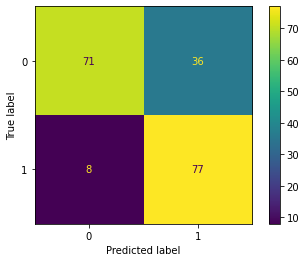

In [15]:
#Hiển thị confusion matrix:
plot_confusion_matrix(MultiNB_1, X_test, y_test)  
plt.show()

## 5. Sử dụng model được huấn luyện dự đoán cho bộ dữ liệu mới
---
Bệnh nhân với các thông số như sau:
* Age: 30 tuổi;
* Shape: Oval;
* Margin: ill-defined
* Density: High


Sử dụng model ở trên dự đoán xem bệnh nhân này bị u lành tính (0) hay ác tính (1)

Age => 30 tuổi chuyển thành 0
* Dưới 34 tuổi        :   --> Age = 0
* Từ 34 --> 49 tuổi:   --> Age = 1
* Từ 49 --> 65 tuổi:   --> Age = 2
* Từ 65 --> 80 tuổi:   --> Age = 3
* Trên 80 tuổi        :   --> Age = 4

Shape => Oval chuyển thành 1
* Round = 0, Oval = 1, Lobular = 2, Irregular = 3

Margin => ill-defined chuyển thành 3
* Circumscribed = 0, Microlobulated = 1, Obscured = 2, ill-defined = 3, Spiculated = 4

Density => High chuyển thành 0
* High = 0, Iso = 1, Low = 2, Fat-containing = 3

In [16]:
X_new = np.array([(0,  1,  3, 0)])

print('Thông số mẫu khối u:', X_new)
#Xác định lớp của hoa dựa vào các thông số này trên model đã huấn luyện
y_new = MultiNB_1.predict(X_new)

print('---------------------------------------------')
print('MACHINE LEARNING dự đoán xem bệnh nhân này bị u lành tính (0) hay ác tính (1):', y_new)
if y_new==0:
    print('\nĐây là khối u lành tính')
else:
    print('\nĐây là khối u ác tính')

Thông số mẫu khối u: [[0 1 3 0]]
---------------------------------------------
MACHINE LEARNING dự đoán xem bệnh nhân này bị u lành tính (0) hay ác tính (1): [1]

Đây là khối u ác tính
